# Exploratory Data Analysis Of Data Science Job Salaries

In [320]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.options.display.float_format = '{:,}'.format

from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [297]:
data = pd.read_csv("datasets/ds_salaries.csv")

# drop redundant columns
data = data.drop(["Unnamed: 0", "salary", "salary_currency"], axis=1)

for i, xp in enumerate(data['experience_level']):
    if data['experience_level'][i] == 'EN':
        data['experience_level'][i] = 'Entry Level'
    elif data['experience_level'][i] == 'MI':
        data['experience_level'][i] = 'Mid Level'
    elif data['experience_level'][i] == 'SE':
        data['experience_level'][i] = 'Senior Level'
    else:
        data['experience_level'][i] = 'Executive Level'

data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior Level,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior Level,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid Level,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior Level,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,FT,Data Engineer,154000,US,100,US,M
603,2022,Senior Level,FT,Data Engineer,126000,US,100,US,M
604,2022,Senior Level,FT,Data Analyst,129000,US,0,US,M
605,2022,Senior Level,FT,Data Analyst,150000,US,100,US,M


In [298]:
data.shape

(607, 9)

- The dataset contains 607 columns and 9 rows

### What data type is contained in the dataset?

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


- The dataset indicates that we've got 3 numerical and 6 categorical variables.

### Are there null values?

In [300]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- Data is clean. No missing values.

## How many jobs are in the dataset?

In [301]:
jobs = data["job_title"].unique()
print(f"There are {len(jobs)} jobs in the dataset.")
jobs

There are 50 jobs in the dataset.


array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

## Univariate Analysis

### What are the top job titles?

In [302]:
job_title = data.groupby("job_title").size().reset_index().sort_values(by=0, ascending=False).head(10)
job_title = job_title.rename(columns={0:"count"})
job_title

,job_title,count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


In [303]:
fig = px.bar(job_title, x="job_title", y="count", 
                color="job_title", title="Top Job titles", 
                text="count").update_layout(xaxis_title="Job titles", yaxis_title="Count", title_x=0.5)
fig

- We've got more data scientists, followed by engineers and analysts.

### Which data profession were the highest and lowest earners from 2020-2022?

#### For 2020

In [304]:
highest_2020 = (data[data.work_year == 2020].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()['salary_in_usd'].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False).head(10)
highest_2020

,job_title,experience_level,company_size,company_location,salary_in_usd
65,Research Scientist,Mid Level,M,US,450000
44,Data Scientist,Senior Level,L,US,412000
46,Director of Data Science,Executive Level,L,US,325000
60,Machine Learning Scientist,Senior Level,S,JP,260000
53,Machine Learning Engineer,Entry Level,L,US,250000
28,Data Science Manager,Senior Level,M,US,190200
51,Lead Data Scientist,Senior Level,S,US,190000
22,Data Engineer,Senior Level,L,US,188000
56,Machine Learning Engineer,Senior Level,L,US,150000
61,Principal Data Scientist,Senior Level,M,DE,148261


In [305]:
fig = px.bar(highest_2020.drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd").update_layout(xaxis_title="Job Title", yaxis_title="Salary")
fig

- In 2020, a research scientist working in the US with mid-level experience in a medium-sized company earned the highest.

In [306]:
lowest_2020 = (data[data.work_year == 2020].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()['salary_in_usd'].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=True).head(10)
lowest_2020

,job_title,experience_level,company_size,company_location,salary_in_usd
26,Data Science Consultant,Entry Level,M,IN,5707
9,Data Analyst,Entry Level,S,IN,6072
62,Product Data Analyst,Mid Level,L,IN,6072
12,Data Analyst,Mid Level,L,PK,8000
10,Data Analyst,Entry Level,S,NG,10000
52,ML Engineer,Entry Level,S,DE,15966
63,Product Data Analyst,Mid Level,S,HN,20000
32,Data Scientist,Entry Level,S,IT,21669
23,Data Engineer,Senior Level,S,MX,33511
35,Data Scientist,Mid Level,L,HU,35735


In [307]:
fig = (px.bar(lowest_2020.drop_duplicates(subset=["job_title"]), 
                                x="job_title", y="salary_in_usd", 
                                color="job_title", text="salary_in_usd", title="Lowest Paying Data Professions in 2020")
                                ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2020, a data science consultant working in India with entry level experience in a medium-sized company earned the least.

#### For 2021:

In [308]:
paying_2021 = (data[data.work_year == 2021].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()["salary_in_usd"].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False)
paying_2021                                    

,job_title,experience_level,company_size,company_location,salary_in_usd
151,Principal Data Engineer,Executive Level,L,US,600000
113,Financial Data Analyst,Mid Level,L,US,450000
7,Applied Machine Learning Scientist,Mid Level,L,US,423000
154,Principal Data Scientist,Executive Level,S,US,416000
121,Lead Data Engineer,Senior Level,L,US,276000
...,...,...,...,...,...
15,Big Data Engineer,Entry Level,L,CH,5882
0,3D Computer Vision Researcher,Mid Level,M,IN,5409
79,Data Scientist,Entry Level,M,VN,4000
53,Data Engineer,Mid Level,M,IR,4000


In [309]:
fig = (px.bar(paying_2021[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Highest Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2021, a principal data engineer working in the US at an executive position in a large company earned the highest.

In [310]:
fig = (px.bar(paying_2021.sort_values(by="salary_in_usd", ascending=True)[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Least Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2021, a data scientist working in Mexico with at a mid-level position in a small company earned the lowest.

#### For 2022:

In [311]:
paying_2022 = (data[data.work_year == 2022].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()["salary_in_usd"].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False)
paying_2022                                    

,job_title,experience_level,company_size,company_location,salary_in_usd
25,Data Analytics Lead,Senior Level,L,US,405000
5,Applied Data Scientist,Senior Level,L,US,380000
33,Data Engineer,Executive Level,M,US,324000
28,Data Architect,Senior Level,M,US,266400
61,Data Scientist,Senior Level,M,US,260000
...,...,...,...,...,...
20,Data Analyst,Mid Level,S,GR,20000
24,Data Analytics Engineer,Entry Level,M,PK,20000
9,Business Data Analyst,Mid Level,M,IN,18442
50,Data Scientist,Entry Level,M,IN,18442


In [312]:
fig = (px.bar(paying_2022[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Highest Paying Data Professions 2022")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2022, a data analytics lead working in the US with senior-level experience in a large company earned the highest.

In [313]:
fig = (px.bar(paying_2022.sort_values(by="salary_in_usd", ascending=True)[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Least Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2022, a computer vision engineer working in Luxembourg with entry-level experience in a medium-sized company earned the least.

From the last 3 observations, it can be deduced that position alone isn't the only factor dictating pay.

### What is the average earning for the top 10 job titles?

In [314]:
average_earn = data.groupby(["job_title"]).mean()["salary_in_usd"].reset_index().sort_values(["salary_in_usd"], ascending=False).head(10)
average_earn["salary_in_usd"]  = average_earn["salary_in_usd"].round(decimals=2)
average_earn

,job_title,salary_in_usd
14,Data Analytics Lead,"405,000.0"
45,Principal Data Engineer,"328,333.33"
28,Financial Data Analyst,"275,000.0"
46,Principal Data Scientist,"215,242.43"
25,Director of Data Science,"195,074.0"
16,Data Architect,"177,873.91"
3,Applied Data Scientist,"175,655.0"
2,Analytics Engineer,"175,000.0"
23,Data Specialist,"165,000.0"
29,Head of Data,"160,162.6"


In [325]:
fig = (px.bar(average_earn, x="job_title", y="salary_in_usd", color="job_title",
                text="salary_in_usd", title="Average Earning For Top 10 Data Professionals")
                ).update_layout(xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=0.5)
fig

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['job_title', 'salary_in_usd'] but received: $salary_in_usd

## Multivariate Analysis

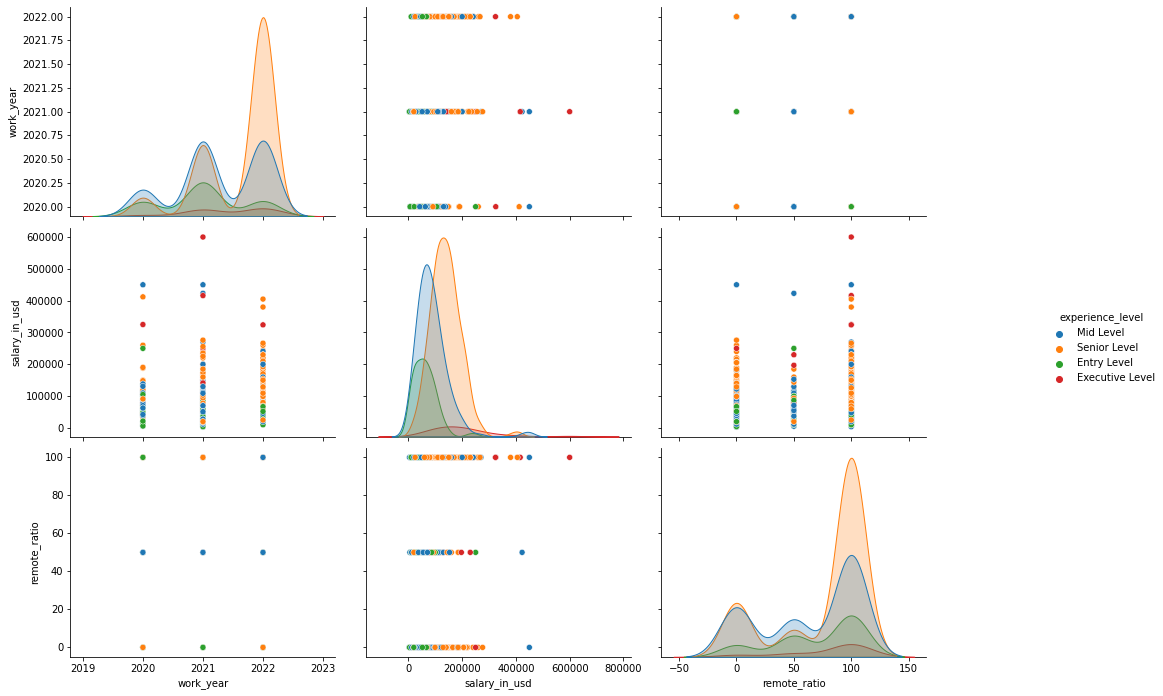

In [316]:
fig = sns.pairplot(data=data, hue="experience_level")
fig.fig.set_size_inches(17,10)